In [3]:
#create list of urls for function to loop through and save as movie_links soup

#import packages 
from bs4 import BeautifulSoup
import requests
from requests import get
import pandas as pd
import numpy as np


url_list= ['https://www.boxofficemojo.com/chart/top_lifetime_gross/?ref_=bo_lnav_hm_shrt',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=200',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=400',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=600',
           'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=800',
          'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=1000']

def getmovielinks(url_list):
    movie_links=[]
    for url in url_list:
        response=requests.get(url)
        soup_movie=BeautifulSoup(response.text, 'lxml')
        #grab movie links
        for x in soup_movie.find_all('a', class_='a-link-normal'):
            movie_links.append(x.get('href')) 
    
    return movie_links

#saving partial links into a variable movielinks
movielinks=getmovielinks(url_list)

In [4]:
movielinks

['/?ref_=bo_nb_cso_mojologo',
 'https://pro.imdb.com/login/ap?u=%2Flogin%2Flwa&imdbPageAction=signUp&ref_=mojo_nb_cso_rollover&rf=mojo_nb_cso_rollover',
 'https://www.facebook.com/BoxOfficeMojo/',
 'https://twitter.com/boxofficemojo',
 '/date/?ref_=bo_nb_cso_tab',
 '/intl/?ref_=bo_nb_cso_tab',
 '/year/world/?ref_=bo_nb_cso_tab',
 '/calendar/?ref_=bo_nb_cso_tab',
 '/charts/overall/?ref_=bo_nb_cso_tab',
 '/showdown/?ref_=bo_nb_cso_tab',
 '/brand/?ref_=bo_nb_cso_tab',
 '/charts/overall/?ref_=bo_nb_cso_secondarytab',
 '/charts/weekend/?ref_=bo_nb_cso_secondarytab',
 '/charts/daily/?ref_=bo_nb_cso_secondarytab',
 '/charts/misc/?ref_=bo_nb_cso_secondarytab',
 '/title/tt2488496/?ref_=bo_cso_table_1',
 '/year/2015/?ref_=bo_cso_table_1',
 '/title/tt4154796/?ref_=bo_cso_table_2',
 '/year/2019/?ref_=bo_cso_table_2',
 '/title/tt0499549/?ref_=bo_cso_table_3',
 '/year/2009/?ref_=bo_cso_table_3',
 '/title/tt1825683/?ref_=bo_cso_table_4',
 '/year/2018/?ref_=bo_cso_table_4',
 '/title/tt4154756/?ref_=bo

In [5]:
movie_urls=[]
def mojomovies(movielinks):
    for link in movielinks:
        if "title" in link:
            final='https://www.boxofficemojo.com'+link
            movie_urls.append(final)
            
    return movie_urls

In [6]:
movie_num=mojomovies(movielinks)

In [7]:
movie_num

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/?ref_=bo_cso_table_8',
 'https://www.boxofficemojo.com/title/tt2527336/?ref_=bo_cso_table_9',
 'https://www.boxofficemojo.com/title/tt3606756/?ref_=bo_cso_table_10',
 'https://www.boxofficemojo.com/title/tt6105098/?ref_=bo_cso_table_11',
 'https://www.boxofficemojo.com/title/tt0468569/?ref_=bo_cso_table_12',
 'https://www.boxofficemojo.com/title/tt3748528/?ref_=bo_cso_table_13',
 'https://www.boxofficemojo.com/title/tt2527338/?ref_=bo_cso_table_14',
 

In [8]:
#getting data from pages and saving into dataframe 
import random

def movie_info(movie_num): 
    #lists to hold values from webpages
    Titles=[]
    Domestic_Gr=[]
    Inter_Gr=[]
    World_Gr=[]
    Dom_Open=[]
    Budget=[]
    Rel_Date=[]
    Runtime=[]
    Genre=[]
    Rating=[]
    
    #loop through each page  
    for i in movie_num:       
        response = requests.get(i)
        
        ##DO THIS: ADD PAUSES HERE TO MIMIC HUMAN USER
        #import time 
        #import fakeuser 

        #saving imported text as variable
        page = response.text

        #parser
        soup = BeautifulSoup(page, "lxml")
    
    
        #GET TITLE FROM EACH PAGE
        try:  
            title=soup.find('h1', class_='a-size-extra-large').text
            Titles.append(title)
        except Exception as error:
            Titles.append(np.nan) 

        #GET DOMESTIC GROSS              
        try:
            domestic_gross=soup.find('span', class_='a-size-medium a-text-bold').text.split()[0]
            Domestic_Gr.append(domestic_gross)
        except Exception as error:
            Domestic_Gr.append(np.nan)

        #GET INTERNATIONAL GROSS
        try:
            int_gross=soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            Inter_Gr.append(int_gross)
        except Exception as error:
            Inter_Gr.append(np.nan)
    
        #WORLDWIDE GROSS
        try: 
            worldwide = soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            World_Gr.append(worldwide)
        except Exception as error:
            World_Gr.append(np.nan)
            
        #DOMESTIC OPENING
        try:
            domestic_open = soup.find('span', text = 'Domestic Opening').find_next('span', class_='money').text
            Dom_Open.append(domestic_open)
        except Exception as error:
            Dom_Open.append(np.nan)

        #BUDGET
        try:
            budget = soup.find('span', text = 'Budget').find_next('span', class_='money').text
            Budget.append(budget)
        except Exception as error:
            Budget.append(np.nan)
            
        #RELEASE DATE
        try:
            release_date=soup.find('span', text = 'Earliest Release Date').find_next('span').text
            Rel_Date.append(release_date)
        except Exception as error:
            Rel_Date.append(np.nan)
    
        #RUNTIME
        try:
            runtime=soup.find('span', text = 'Running Time').find_next('span').text
            Runtime.append(runtime)
        except Exception as error:
            Runtime.append(np.nan)
                  
        #GENRE
        try:
            genre=soup.find('span', text = 'Genres').find_next('span').text
            Genre.append(genre)
        except Exception as error:
            Genre.append(np.nan)
              
        #RATING
        try: 
            rating=soup.find('span', text = 'MPAA').find_next('span').text
            Rating.append(rating)
        except Exception as error:
            Rating.append(np.nan)
        #Movie Cast
        

        
    movies_dict={'Title':Titles,'Domestic_Gr':Domestic_Gr, 'Inter_Gr':Inter_Gr,'World_Gr':World_Gr, 
             'Dom_Open':Dom_Open, 'Budget':Budget,'Rel_Date':Rel_Date, 'Runtime':Runtime, 
             'Genre':Genre,'Rating':Rating}
        
    movies_data=pd.DataFrame(movies_dict)
    
    return movies_data

In [10]:
df2=movie_info(movie_num)

ConnectionError: HTTPSConnectionPool(host='www.boxofficemojo.com', port=443): Max retries exceeded with url: /title/tt0478087/?ref_=bo_cso_table_182 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001F96FAEB250>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
df2.to_csv('offset2.csv')

In [11]:
df=pd.read_csv('offset1200.csv')

In [12]:
df=df.drop(['Unnamed: 0'], axis=1 )

In [13]:
df.columns

Index(['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Dom_Open', 'Budget',
       'Rel_Date', 'Runtime', 'Genre', 'Rating'],
      dtype='object')

In [14]:
df.rename(columns={'Domestic_Gr': 'Dom_Gross_mil', 'Inter_Gr': 'Int_Gross_mil', 'World_Gr': 'Worldwide_mil', 'Dom_Open': 'Opening_mil', 'Budget':'Budget_mil'}, inplace=True)

#fill NaN with zeros
df=df.fillna(0)

#remove commas and dollar signs from monetary columns
df[df.columns[1:6]] = df[df.columns[1:6]].replace('[\$,]', '', regex=True).astype(float)

In [15]:
df['Dom_Gross_mil'] = df['Dom_Gross_mil'].apply(lambda x: x/1000000)
df['Int_Gross_mil'] = df['Int_Gross_mil'].apply(lambda x: x/1000000)
df['Worldwide_mil'] = df['Worldwide_mil'].apply(lambda x: x/1000000)
df['Opening_mil'] = df['Opening_mil'].apply(lambda x: x/1000000)
df['Budget_mil'] = df['Budget_mil'].apply(lambda x: x/1000000)

In [16]:
df.shape

(1000, 10)

In [17]:
df.set_index('Title', inplace = True)

In [18]:
df.loc[:, 'Rel_Month'] = df.Rel_Date.map(lambda x: x.split()[0])

In [25]:
df.loc[:, 'Gross_Domestic_Revenue']=df['Dom_Gross_mil']-df['Opening_mil']

In [31]:
df.tail()

,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Gross_Domestic_Revenue
Title,,,,,,,,,,,
Saw III (2006),80.238724,84.635551,164.874275,33.610391,10.0,"October 27, 2006\n (Domestic, EMEA)",1 hr 48 min,Crime\n \n Horror\n \n Mys...,R,October,46.628333
The Mummy (2017),80.227895,329.003712,409.231607,31.688375,125.0,"June 6, 2017\n (South Korea)",1 hr 51 min,Action\n \n Adventure\n \n ...,PG-13,June,48.539520
Disturbia (2007),80.209692,37.904528,118.114220,22.224982,20.0,"April 12, 2007\n (APAC)",1 hr 45 min,Crime\n \n Drama\n \n Myst...,PG-13,April,57.984710
Nacho Libre (2006),80.197993,19.057467,99.255460,28.309599,35.0,"June 16, 2006\n (Domestic)",1 hr 32 min,Comedy\n \n Family\n \n Sport,PG,June,51.888394
Jumper (2008),80.172128,144.959985,225.132113,27.354808,85.0,"February 13, 2008\n (6 markets)",1 hr 28 min,Action\n \n Adventure\n \n ...,PG-13,February,52.817320


In [33]:
df=df[df.Gross_Domestic_Revenue != 0.0]
df=df[df.Budget_mil != 0.0]
df=df[df.Dom_Gross_mil != 0.0]
df=df[df.Int_Gross_mil != 0.0]
df=df[df.Opening_mil != 0.0]

In [34]:
df.shape

(808, 11)

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
%matplotlib inline

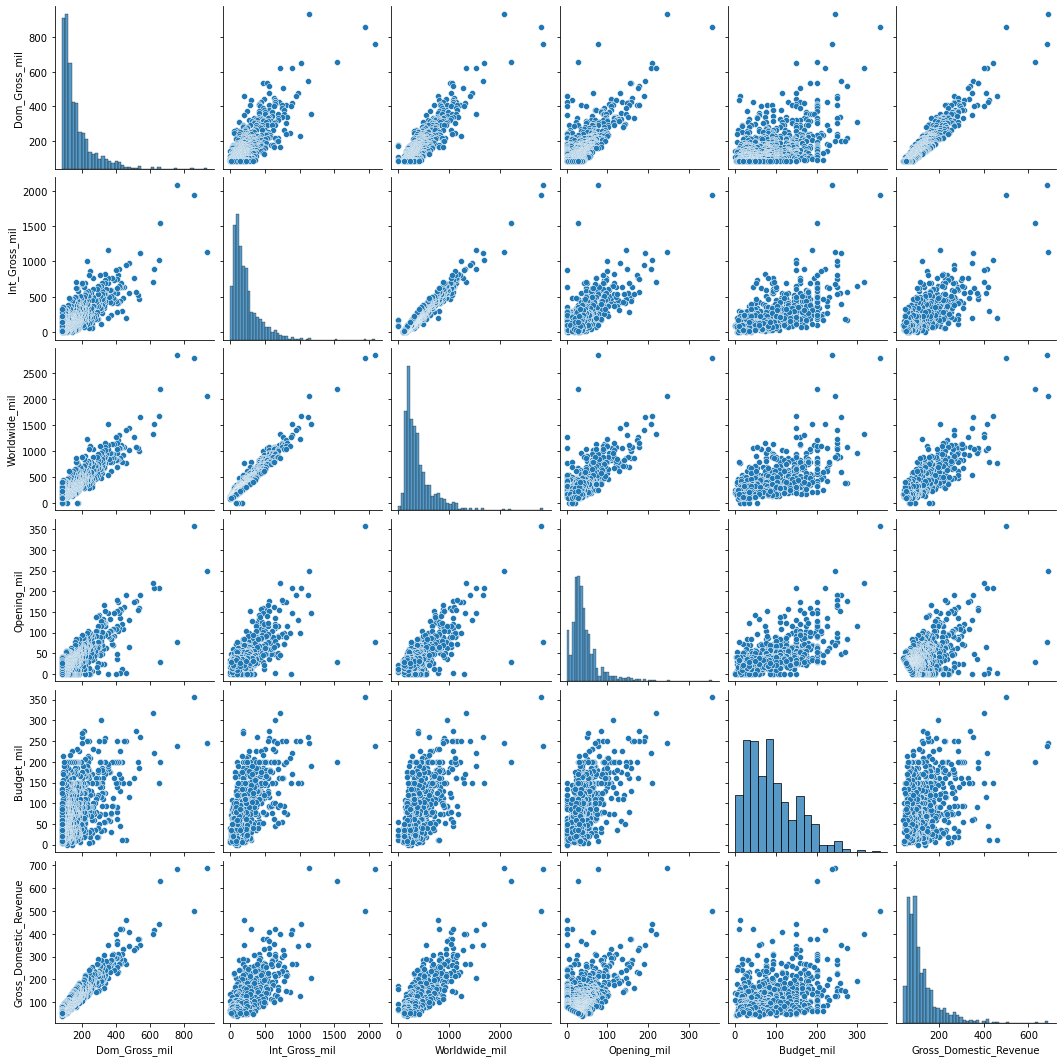

In [36]:
sns.pairplot(df);

<AxesSubplot:>

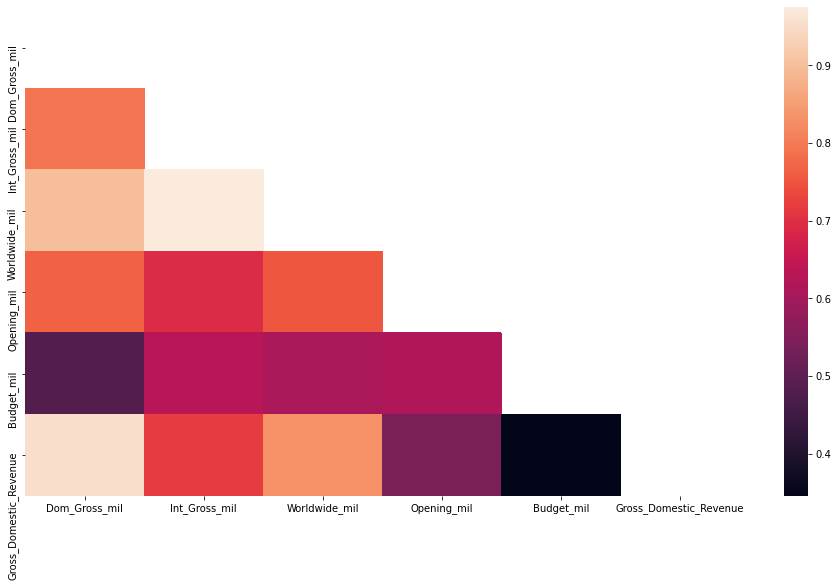

In [51]:
plt.figure(figsize=(16,9))
 
corr_mx = df.corr() # correlation matrix
 
matrix = np.triu(corr_mx) # take upper correlation matrix
 
sns.heatmap(corr_mx, mask=matrix)

In [49]:
df.corr()

,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Gross_Domestic_Revenue
Dom_Gross_mil,1.000000,0.792463,0.900165,0.767411,0.481097,0.955505
Int_Gross_mil,0.792463,1.000000,0.975539,0.694013,0.632124,0.717697
Worldwide_mil,0.900165,0.975539,1.000000,0.751883,0.612449,0.832009
Opening_mil,0.767411,0.694013,0.751883,1.000000,0.617707,0.544142
Budget_mil,0.481097,0.632124,0.612449,0.617707,1.000000,0.345361
Gross_Domestic_Revenue,0.955505,0.717697,0.832009,0.544142,0.345361,1.000000


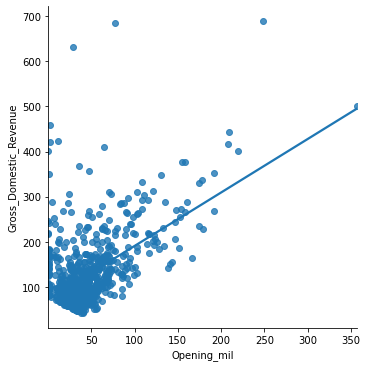

In [52]:
sns.lmplot(x ="Opening_mil", y ="Gross_Domestic_Revenue", data = df, order = 1, ci = None)


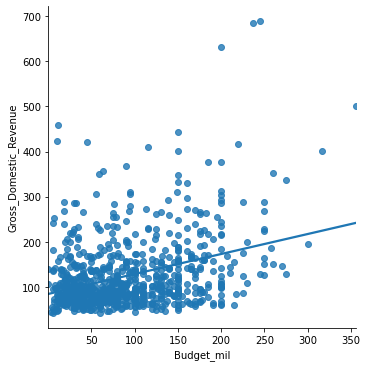

In [53]:
sns.lmplot(x ="Budget_mil", y ="Gross_Domestic_Revenue", data = df, order = 1, ci = None)

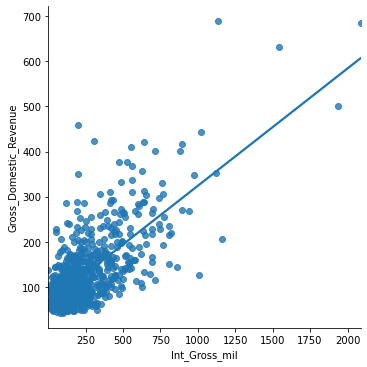

In [54]:
sns.lmplot(x ="Int_Gross_mil", y ="Gross_Domestic_Revenue", data = df, order = 1, ci = None)

In [55]:
df.to_csv('final_data.csv')